Let's import different libraries and Dataset

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
pd.set_option('display.max_columns', 200)

In [213]:
import os
os.listdir('E:/Portfolio/archive')

['supermarket_sales - Sheet1.csv']

In [214]:
df= pd.read_csv(r'E:/Portfolio/archive/supermarket_sales - Sheet1.csv')

In [215]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [216]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

# Data Pre-Processing

In [217]:
df['Date']= pd.to_datetime(df['Date'])  #For DateTime Manipulation

In [218]:
df['Time']= pd.to_datetime(df['Time'])  #For DateTime Manipulation

In [219]:
df['Total']= df['Total'].astype('int')  #For Calculation and Plotting

In [220]:
df['Unit price']= pd.to_numeric(df['Unit price']) #For Calculation and Plotting

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   int32         
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [222]:
df['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [223]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Great! Dataset has no null value.

In [224]:
df.duplicated().sum()

0

Dataset has no Duplicate values

In [225]:
def extract_values(x):
    day= x.day
    month= x.month
    year= x.year
    day_name= x.day_name()
    return pd.Series([day, month, year, day_name])

In [226]:
df[['day', 'month', 'year', 'day_name']]=df['Date'].apply(extract_values)

In [227]:
df['Hour'] = df['Time'].dt.hour

In [228]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,year,day_name,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548,2019-01-05,2023-05-24 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,Saturday,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80,2019-03-08,2023-05-24 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,Friday,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340,2019-03-03,2023-05-24 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,Sunday,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489,2019-01-27,2023-05-24 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,Sunday,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634,2019-02-08,2023-05-24 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,Friday,10


In [229]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'day', 'month', 'year', 'day_name', 'Hour'],
      dtype='object')

In [230]:
df.columns= df.columns.str.capitalize()

# Descriptive_Analysis

In [231]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.67,26.49,10.08,32.88,55.23,77.94,99.96
Quantity,1000.0,5.51,2.92,1.00,3.00,5.00,8.00,10.00
Tax 5%,1000.0,15.38,11.71,0.51,5.92,12.09,22.45,49.65
Total,1000.0,322.47,245.88,10.00,124.25,253.50,471.25,1042.00
Cogs,1000.0,307.59,234.18,10.17,118.50,241.76,448.90,993.00
Gross margin percentage,1000.0,4.76,0.00,4.76,4.76,4.76,4.76,4.76
Gross income,1000.0,15.38,11.71,0.51,5.92,12.09,22.45,49.65
Rating,1000.0,6.97,1.72,4.00,5.50,7.00,8.50,10.00
Day,1000.0,15.26,8.69,1.00,8.00,15.00,23.00,31.00
Month,1000.0,1.99,0.84,1.00,1.00,2.00,3.00,3.00


In [232]:
df.corr().round(2)

,Unit price,Quantity,Tax 5%,Total,Cogs,Gross margin percentage,Gross income,Rating,Day,Month,Year,Hour
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01,0.06,-0.03,NaN,0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02,-0.04,-0.01,NaN,-0.01
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
Cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
Gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,-0.00,-0.02,NaN,-0.00
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00,-0.01,-0.04,NaN,-0.03
Day,0.06,-0.04,-0.00,-0.00,-0.00,NaN,-0.00,-0.01,1.00,-0.12,NaN,0.02
Month,-0.03,-0.01,-0.02,-0.02,-0.02,NaN,-0.02,-0.04,-0.12,1.00,NaN,0.04


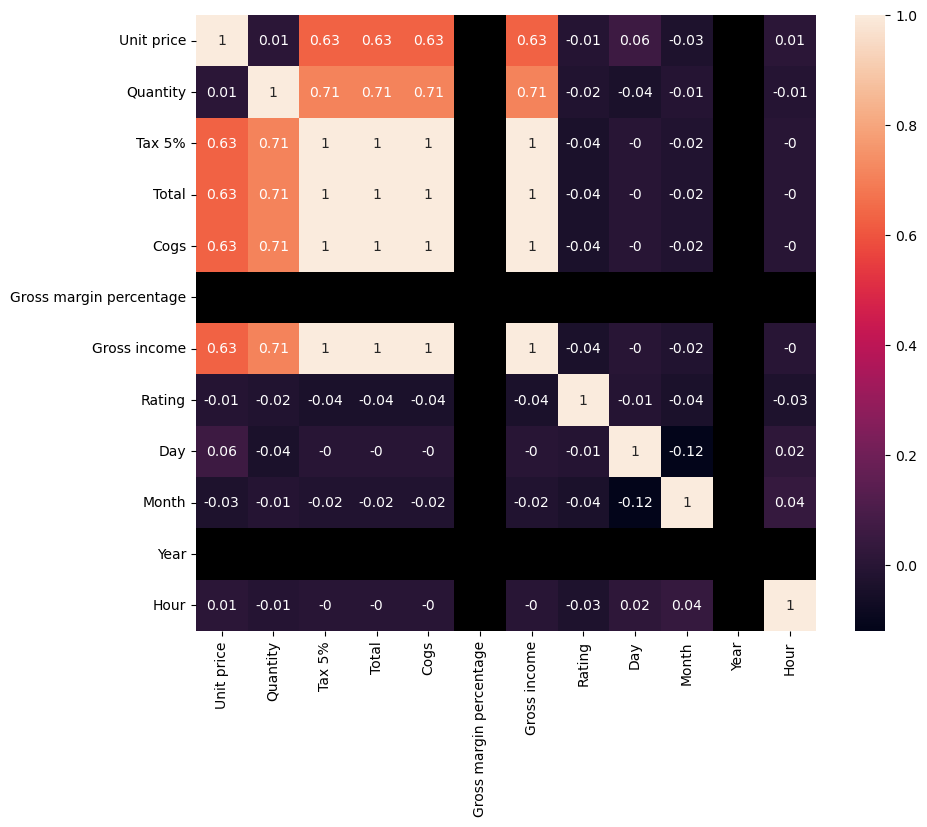

In [233]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr().round(2), annot=True);

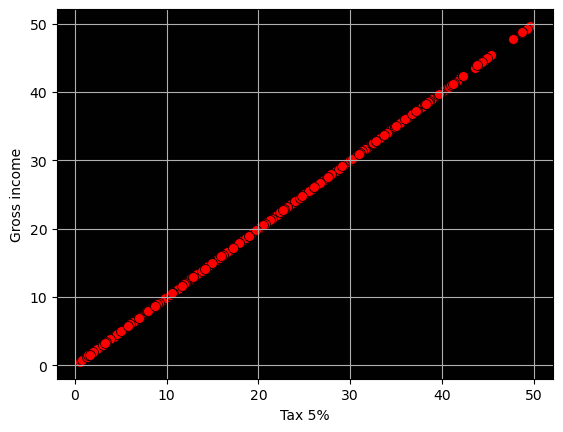

In [234]:
sns.set_style(rc= {'axes.facecolor': '#000100'})
sns.scatterplot(x='Tax 5%', y= 'Gross income', data= df, color= 'red', edgecolor='black', s=50)
plt.grid(False);


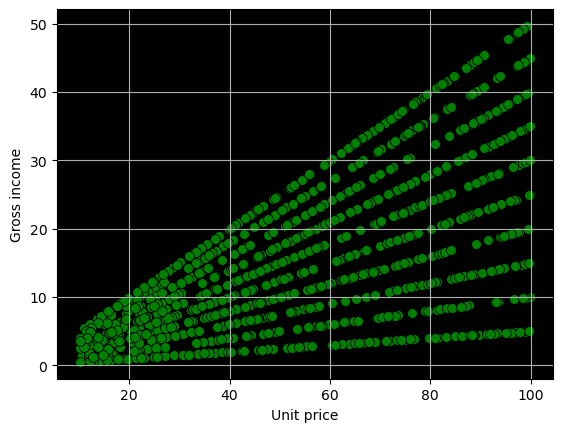

In [235]:
sns.set_style(rc= {'axes.facecolor': '#000100'})
sns.scatterplot(x='Unit price', y= 'Gross income', data= df, color= 'green', edgecolor='black', s=50)
plt.grid(False);

Finding Relationship Between Data

In [236]:
df.groupby('City')['Gross income'].median()

City
Mandalay     12.04200
Naypyitaw    12.92475
Yangon       11.46800
Name: Gross income, dtype: float64

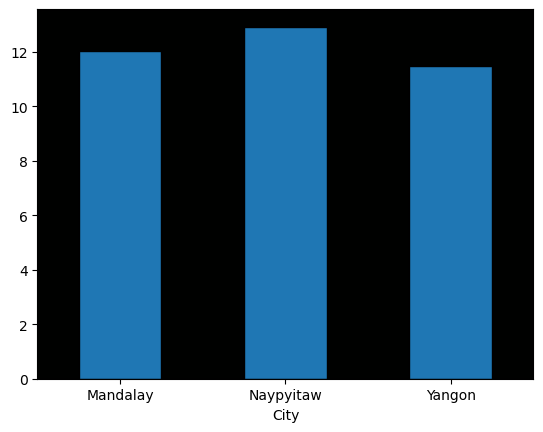

In [237]:
df.groupby('City')['Gross income'].median().plot(kind= 'bar', edgecolor= 'black')
plt.xticks(rotation= 0);

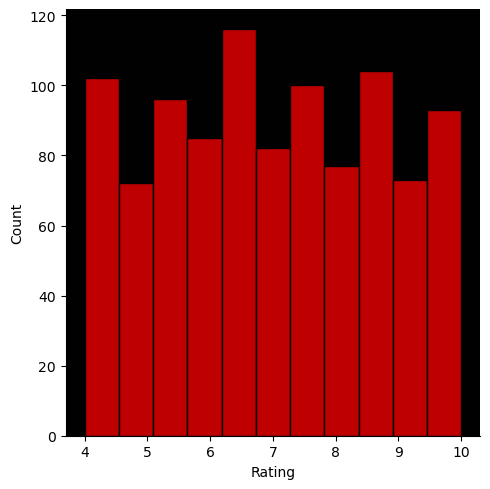

In [238]:
sns.displot(data= df, x='Rating', kde= False, color= 'red', edgecolor= 'black');

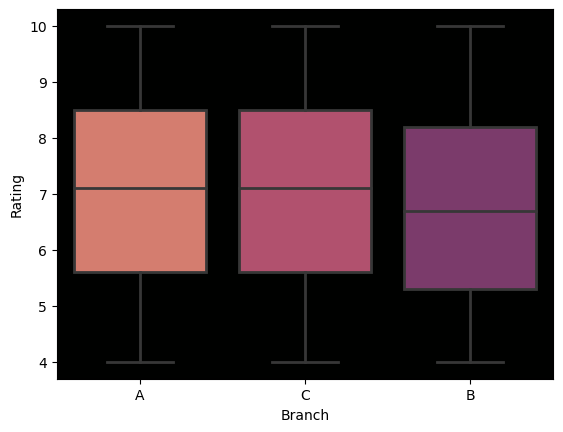

In [239]:
sns.boxplot(data= df, x='Branch', y= 'Rating', linewidth=2, palette='flare')
plt.grid(False)

It seems `B` Branch has slightly low Ratings.

In [240]:
hourly_sales = df.groupby('Hour')['Quantity'].sum()
hourly_sales

Hour
10    525
11    513
12    501
13    585
14    495
15    530
16    420
17    415
18    475
19    649
20    402
Name: Quantity, dtype: int64

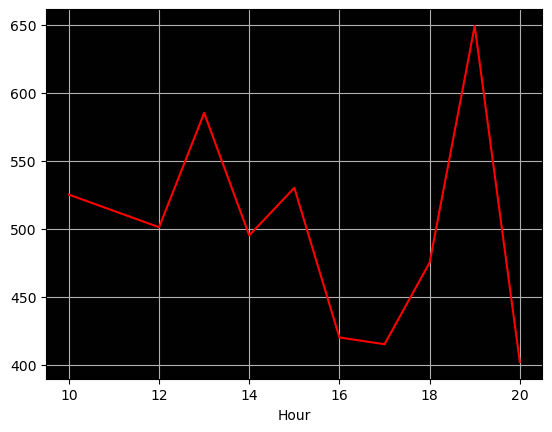

In [241]:
sns.lineplot(data= hourly_sales, x= hourly_sales.index, y= hourly_sales.values, color= 'Red')
plt.grid(True);

It shows supermarket sold most of their product from approx 18:00 to 20:00 in 3 months in all branches

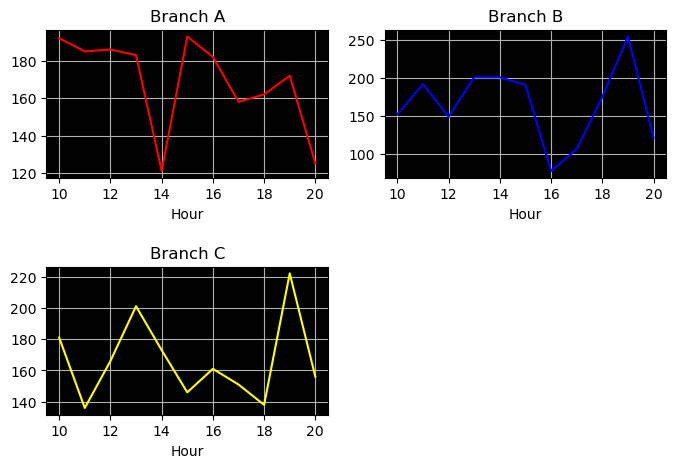

In [242]:
fig, ax= plt.subplots(2, 2, figsize= (8,5))

ax[0, 0].plot(df[df['Branch'] == 'A'].groupby('Hour')['Quantity'].sum(), color='red')
ax[0, 1].plot(df[df['Branch'] == 'B'].groupby('Hour')['Quantity'].sum(), color='blue')
ax[1, 0].plot(df[df['Branch'] == 'C'].groupby('Hour')['Quantity'].sum(), color='yellow')

ax[0,0].set_title('Branch A')
ax[0,0].set_xlabel('Hour')
ax[0,0].grid(True)
ax[0,1].set_title('Branch B')
ax[0,1].set_xlabel('Hour')
ax[0,1].grid(True)
ax[1,0].set_title('Branch C')
ax[1,0].set_xlabel('Hour')
ax[1,0].grid(True)

plt.subplots_adjust(hspace=0.6)


ax[1,1].axis('off');

But if we see individually Branch A shows it sales mainly between 14:00 to 16:00

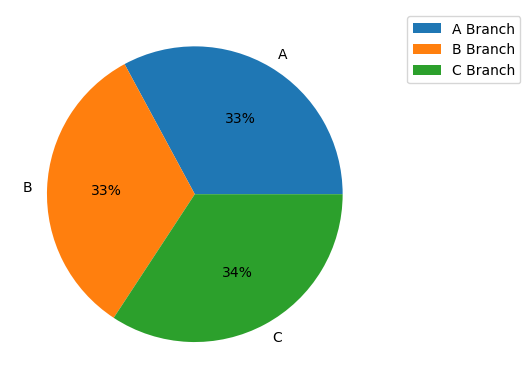

In [243]:
df.groupby('Branch')['Total'].sum().plot(kind='pie', autopct= '%.0f%%')
plt.legend(['A Branch', 'B Branch', 'C Branch'], bbox_to_anchor= (1.4,1), facecolor= 'white')
plt.ylabel('');

It seems like all the Branches are having approx same Total Sales

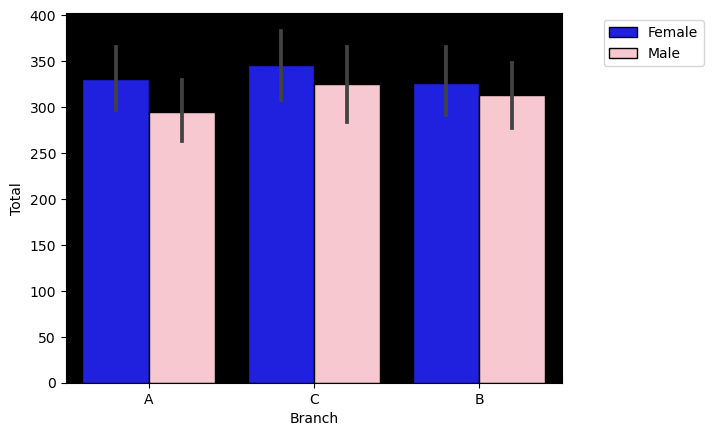

In [244]:
sns.set_style(rc= {'axes.facecolor': '#000000'})
sns.barplot(data= df, x='Branch', y='Total', hue='Gender', edgecolor= 'black', palette=['blue', 'pink'])
plt.legend(bbox_to_anchor= (1.3,1), facecolor= 'white')
plt.grid(False);

All the Branches have `almost` same distribution between Male and Female Customers in sense of Total Sales

In [245]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

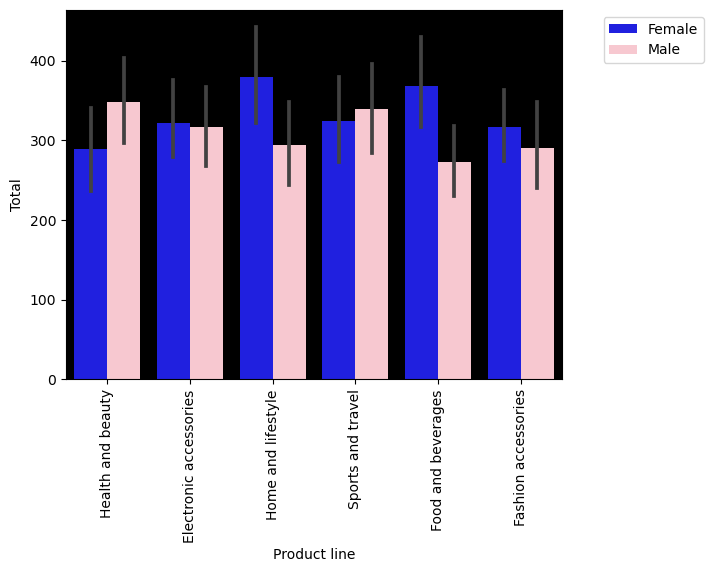

In [246]:
sns.barplot(data= df, x= 'Product line', y= 'Total', hue= 'Gender', palette=['blue', 'pink'])
plt.xticks(rotation= 90)
plt.legend(bbox_to_anchor= (1.3,1), facecolor= 'white')
plt.grid(False);

It shows Male are more interested toward `Health and Beauty Products` and Female are more interested toward `Home and Lifestyle`

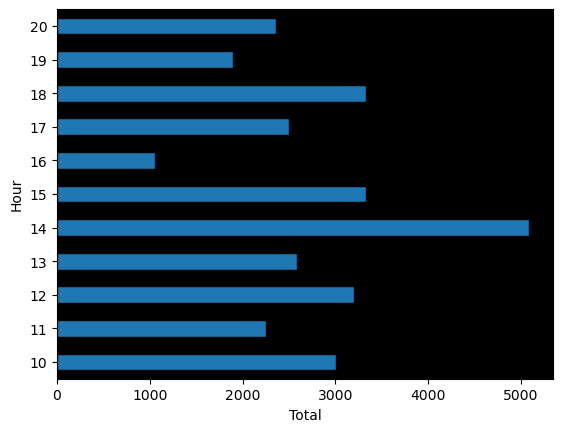

In [247]:
df[(df['Product line']=='Health and beauty') & (df['Gender']== 'Male')].groupby('Hour')['Total'].sum().plot(kind= 'barh', edgecolor= 'black')
plt.xlabel('Total')
plt.grid(False);

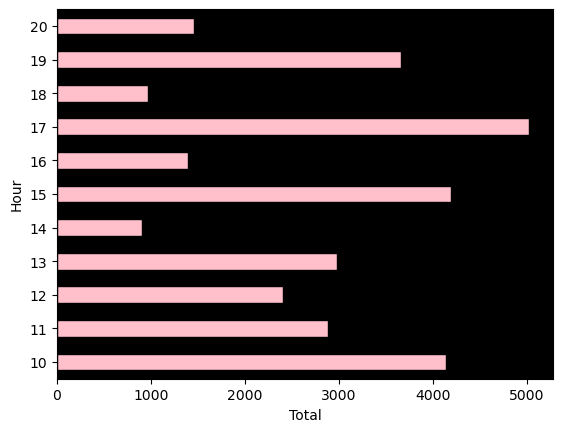

In [248]:
df[(df['Product line']=='Home and lifestyle') & (df['Gender']== 'Female')].groupby('Hour')['Total'].sum().plot(kind= 'barh', edgecolor= 'black', color= 'pink')
plt.xlabel('Total')
plt.grid(False);

Male tends to buy there most favorite products ideally at `14:00` and Female tends to buy them at `17:00`

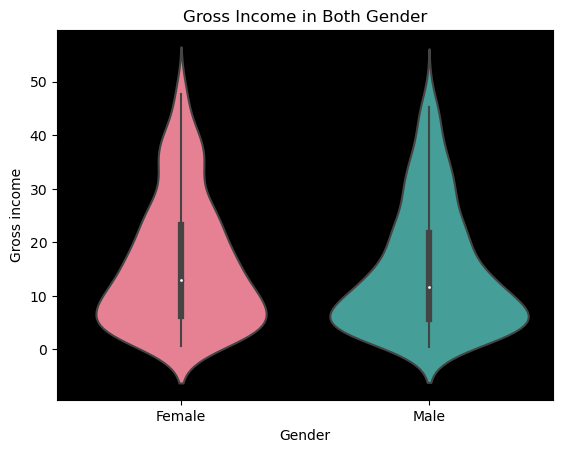

In [249]:
sns.violinplot(data=df, x='Gender', y='Gross income', palette= 'husl')
plt.title('Gross Income in Both Gender');

In [250]:
#What else we can analyse?
df.head()

,Invoice id,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Cogs,Gross margin percentage,Gross income,Rating,Day,Month,Year,Day_name,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548,2019-01-05,2023-05-24 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,Saturday,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80,2019-03-08,2023-05-24 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,Friday,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340,2019-03-03,2023-05-24 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,Sunday,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489,2019-01-27,2023-05-24 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,Sunday,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634,2019-02-08,2023-05-24 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,Friday,10


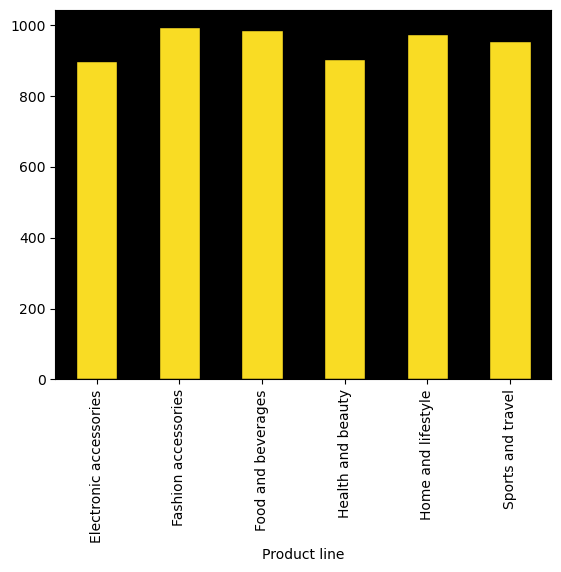

In [251]:
#Which category of product line is most expensive?

df.groupby('Product line')['Cogs'].max().plot(kind= 'bar', edgecolor= 'black', color= '#F9DC24')
plt.grid(False);

Well it didn't heldped us very much.

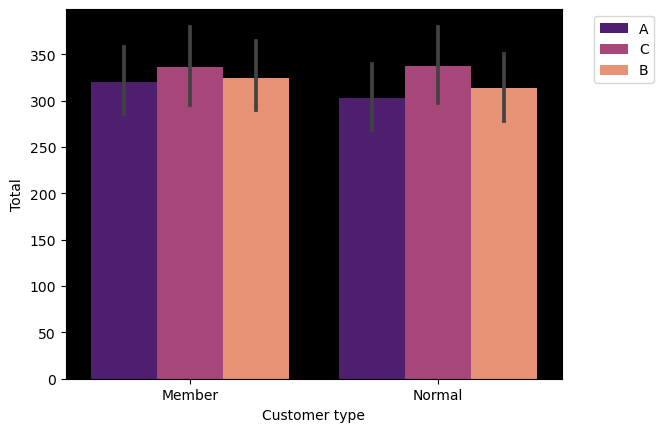

In [252]:
sns.barplot(data= df, x='Customer type', y='Total', hue='Branch', palette='magma')
plt.legend(bbox_to_anchor= (1.2,1), facecolor='white')
plt.grid(False);

We have got approx equal amount of Normal and Member Customer across all Branches

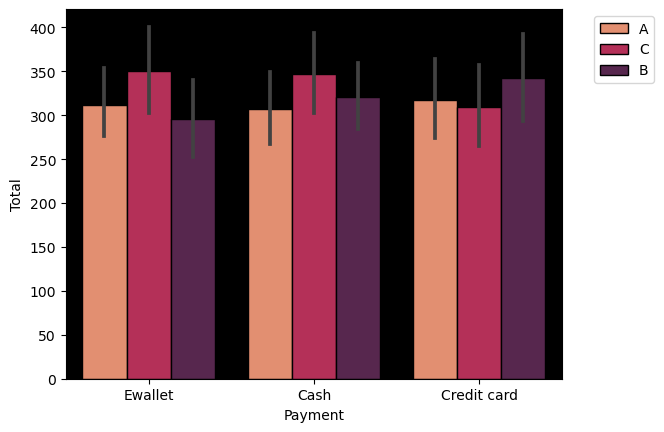

In [253]:
sns.barplot(data= df, x='Payment', y= 'Total', hue='Branch', edgecolor= 'black', palette= 'rocket_r')
plt.grid(False)
plt.legend(bbox_to_anchor= (1.2,1), facecolor= 'white');

Payment method are generally same between all Branches

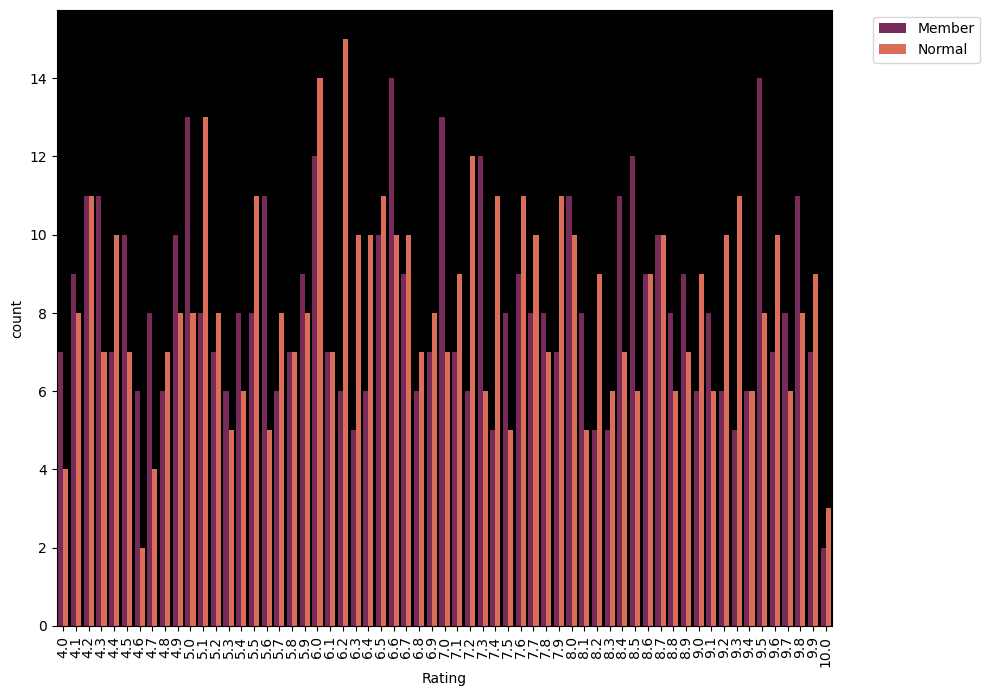

In [254]:
plt.figure(figsize= (10,8))
sns.countplot(data= df, x= 'Rating', hue='Customer type', palette='rocket')
plt.xticks(rotation= 90)
plt.legend(bbox_to_anchor= (1.2,1), facecolor='white');

We can see from this that normal customer tends to give below 6 rating and member customer generally gives above 9.

In [255]:
#Let's see which Product Line has most ratings

grouped_product= df.groupby('Product line')['Rating'].mean().reset_index(drop= False)
grouped_product['Rating'] = grouped_product['Rating'].round(2)
grouped_product= grouped_product.sort_values(by= 'Rating', ascending=False)
grouped_product

,Product line,Rating
2,Food and beverages,7.11
1,Fashion accessories,7.03
3,Health and beauty,7.00
0,Electronic accessories,6.92
5,Sports and travel,6.92
4,Home and lifestyle,6.84


Text(0.5, 1.0, 'Average Rating for Product Lines')

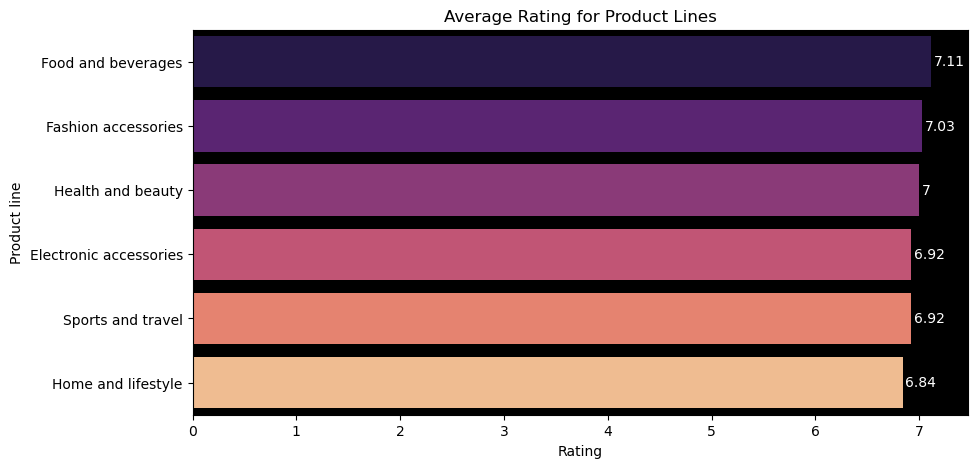

In [256]:
plt.figure(figsize= (10,5))
pal = 'magma'
ax = sns.barplot(y = 'Product line' , x = 'Rating' , data = grouped_product, palette=pal)
ax.bar_label(ax.containers[0], color= 'white', padding=2)
plt.title('Average Rating for Product Lines')

It seems like `Food and Beverages` has the most ratings.

Let see which month sold the most product

In [257]:
grouped_month= df.groupby('Month')['Quantity'].sum().reset_index(drop=False)
grouped_month

,Month,Quantity
0,1,1965
1,2,1654
2,3,1891


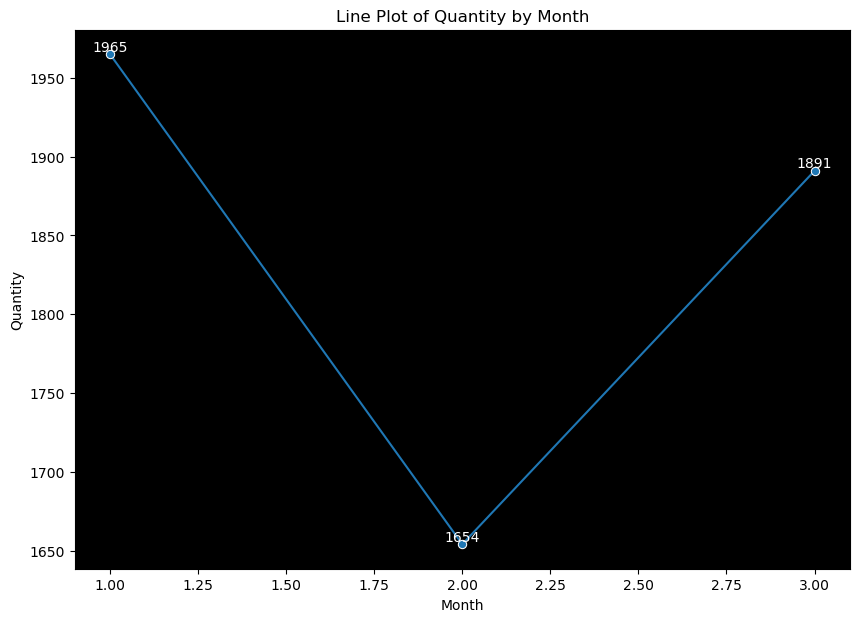

In [258]:
plt.figure(figsize=(10,7))
sns.lineplot(x = 'Month' , y = 'Quantity' , data = grouped_month , marker ='o')
xpoints =  grouped_month['Month']
ypoints = grouped_month['Quantity']
for x, y in zip(xpoints, ypoints):
    plt.text(x, y, str(y), ha='center', va='bottom', color= 'white')
plt.title('Line Plot of Quantity by Month');


As we can say `Second Month` is the lowest in sense of Quantity sold.

In [259]:
day_quantity= df.groupby(['Day_name'])['Quantity'].sum().reset_index(drop=False)
day_quantity

,Day_name,Quantity
0,Friday,758
1,Monday,638
2,Saturday,919
3,Sunday,778
4,Thursday,755
5,Tuesday,862
6,Wednesday,800


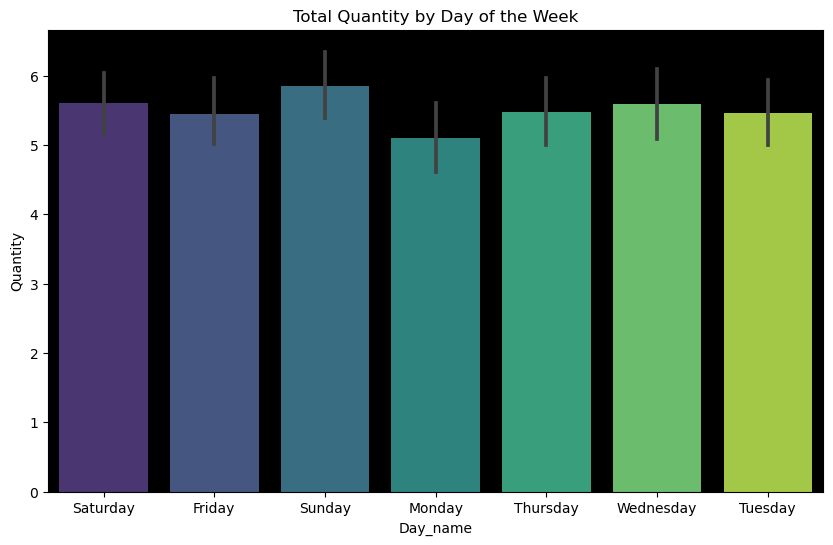

In [260]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Day_name', y='Quantity', palette='viridis')
plt.title('Total Quantity by Day of the Week');

`Sunday` is the day when most of the Product are sold.